In [1]:
from tqdm import tqdm
tqdm.pandas()
import os 
import sys
import pandas as pd
#connect local PATH
p = os.path.abspath(r'C:\Users\Ben\Desktop\Diplomatiki')
sys.path.append(str(p))
from CryptoSent.tools.utils import load_submissions
subs=load_submissions()

<AxesSubplot:xlabel='created'>

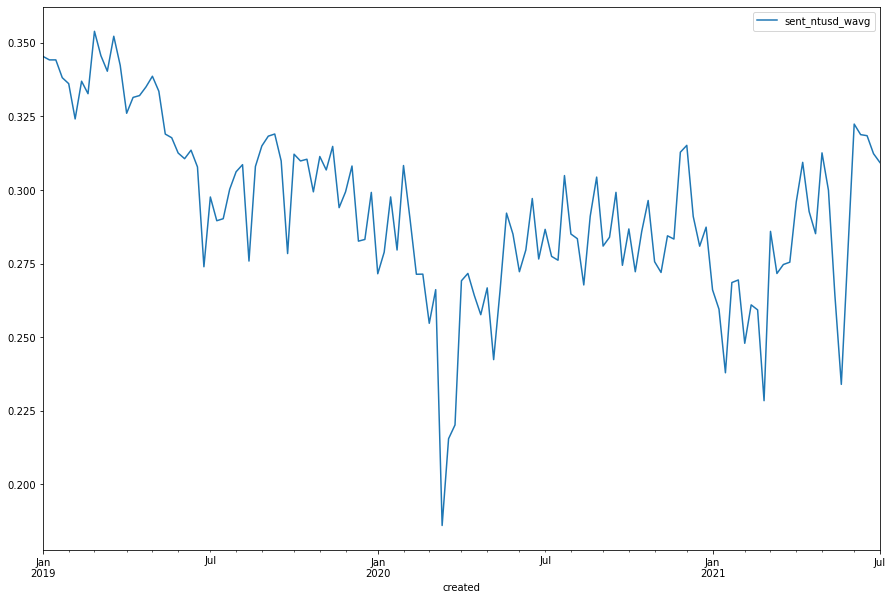

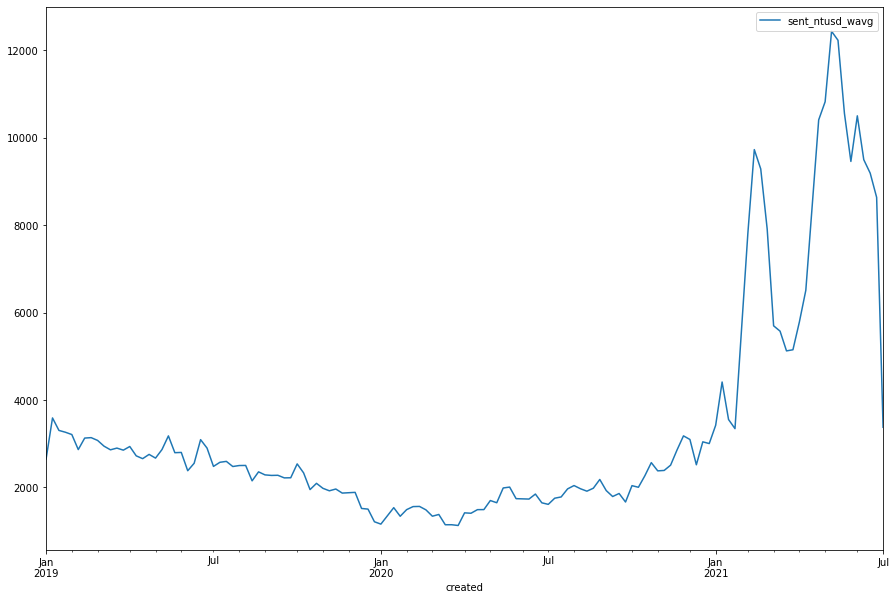

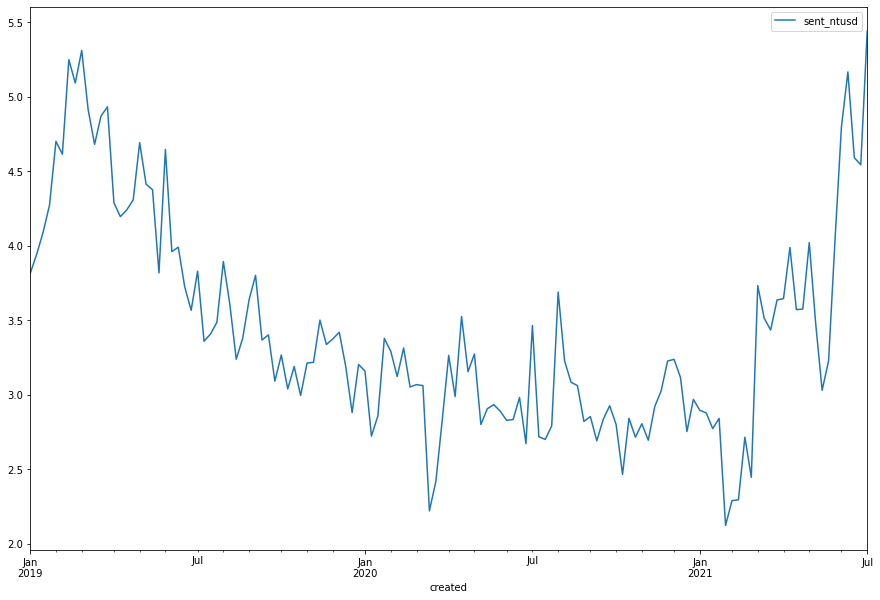

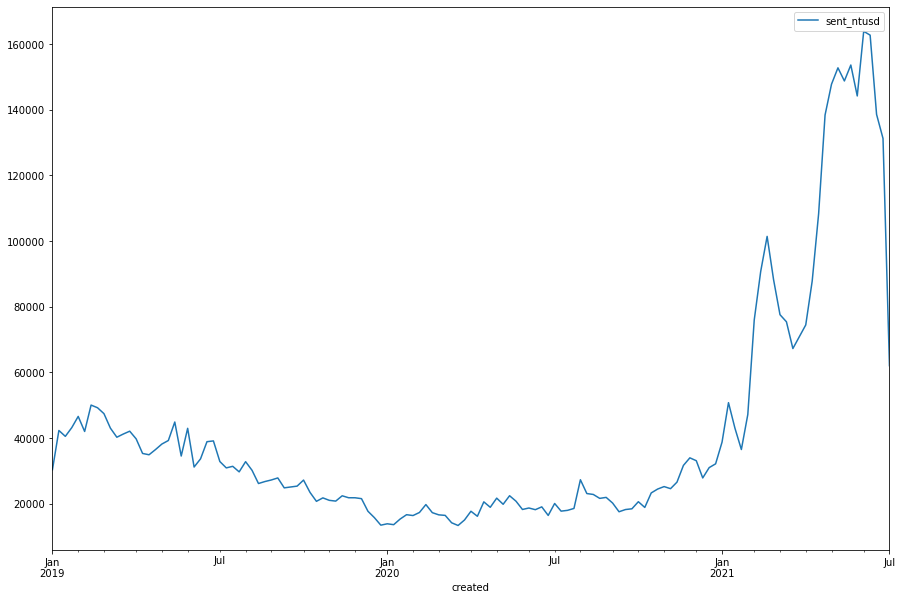

In [32]:
subs[['sent_ntusd_wavg']].resample('w').mean().plot(figsize=(15,10))
subs[['sent_ntusd_wavg']].resample('w').sum().plot(figsize=(15,10))

subs[['sent_ntusd']].resample('w').mean().plot(figsize=(15,10))
subs[['sent_ntusd']].resample('w').sum().plot(figsize=(15,10))

## Proccess

In [ ]:
ntword=pd.read_json('Datasets/NTUSD_Fin_word_v1.0.json')
ntemoji=pd.read_json('Datasets/NTUSD_Fin_emoji_v1.0.json')
nthastag=pd.read_json('Datasets/NTUSD_Fin_hashtag_v1.0.json')
word2sent=ntword.set_index('token').market_sentiment.to_dict()
emoji2sent=ntemoji.set_index('token').market_sentiment.to_dict()

def get_ntusd_score(text):
    score=0
    for token in text.split():
        if token in word2sent:
            score=score+word2sent[token]
        if token in emoji2sent:
            score=score+emoji2sent[token]
    return score

coms['sent_ntusd']=coms.body_clean.progress_apply(get_ntusd_score)

subs['sent_ntusd']=subs.clean_text.progress_apply(get_ntusd_score)
coms1=coms[coms.submission_id.isin(subs.id.unique().tolist())]
subid_to_sent_com_ntusd=coms1.groupby('submission_id').sent_ntusd.sum().to_dict()
subs['sent_ntusd_coms']=subs.id.map(subid_to_sent_com_ntusd)

subs=subs.rename(columns={'kpi1':'awards_value'})
#subs.to_pickle('Datasets/submissions.pickle')

nmean=pd.read_pickle('temp_ntsud_mean.pickle')

subs['sent_ntusd_coms_wavg']=subs.id.map(nmean.to_dict())


subs[['author', 'num_comments', 'score', 'title', 'selftext', 'award_name',
       'award_description', 'award_count', 'award_coin_price',
       'award_coin_reward', 'subreddit', 'subreddit_subscribers', 'id',
       'domain', 'no_follow', 'send_replies', 'author_fullname',
       'subreddit_id', 'permalink', 'url', 'created', 'author_created',
       'clean_text', 'origin',  'topic',
       'author_karma', 'awards_value', 'author_posts', 'num_awards',
       'sell', 'buy',
       'sent_ntusd','sent_ntusd_wavg','sent_ntusd_coms', 'sent_ntusd_coms_wavg',
       'sent_lr',
       'sent_lr_coms', 
       'sent_db', 'sent_fb','sent_fbt', 
       'sent_dbe_sadness', 'sent_dbe_joy', 'sent_dbe_love','sent_dbe_anger', 'sent_dbe_fear', 'sent_dbe_surprise'
       ]].to_pickle(r'C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\Main Dataset\submissions.pickle')



ntword=pd.read_json(r'C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\other\NTUSD_Fin_word_v1.0.json')
ntemoji=pd.read_json(r'C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\other\NTUSD_Fin_emoji_v1.0.json')
nthastag=pd.read_json(r'C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\other\NTUSD_Fin_hashtag_v1.0.json')
word2sent=ntword.set_index('token').market_sentiment.to_dict()
emoji2sent=ntemoji.set_index('token').market_sentiment.to_dict()


def get_ntusd_score(text):
    score=0
    for token in text.split():
        if token in word2sent:
            score=score+word2sent[token]
        if token in emoji2sent:
            score=score+emoji2sent[token]
    return score



def get_ntusd_score_wavg(text):
    score=0
    count=0
    for token in text.split():
        if token in word2sent:
            score=score+word2sent[token]
            count=count+1
        if token in emoji2sent:
            score=score+emoji2sent[token]
            count=count+1
    try :return score/count
    except: 0